<a href="https://colab.research.google.com/github/anvisud24/Projects/blob/main/hsp90_potency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
data=pd.read_csv('/content/hsp90.csv')
data.head()

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type,Standard Text Value
0,CHEMBL1812725,NaN,NaN,1237.57,NaN,NaN,2-T-I,CC(C)C[C@@H]1NC(=O)[C@H](CCCCNC(=O)OCc2ccccc2)...,Activity,NaN,...,PROTEIN FAMILY,CHEMBL1811842,1,Scientific Literature,Bioorg Med Chem Lett,2011.0,NaN,NaN,NaN,NaN
1,CHEMBL1253309,NaN,NaN,235.33,0.0,3.00,19,CCN(CC)C(=O)c1cc(C(C)C)ccc1O,Kd,'=',...,PROTEIN FAMILY,CHEMBL1250514,1,Scientific Literature,J Med Chem,2010.0,NaN,NaN,NaN,NaN
2,CHEMBL552184,NaN,NaN,404.90,0.0,2.74,If,COc1c(C)cnc(CN2CC(=O)N(CC(C)C)c3c(Cl)nc(N)nc32...,IC50,'=',...,PROTEIN FAMILY,CHEMBL1151905,1,Scientific Literature,Bioorg Med Chem Lett,2009.0,CHEMBL3308062,NaN,NaN,NaN
3,CHEMBL215947,NaN,NaN,417.95,0.0,3.57,37,Nc1ncnc2c1nc(Sc1nc3cccc(Cl)c3s1)n2CCNC1CC1,IC50,'=',...,PROTEIN FAMILY,CHEMBL1146181,1,Scientific Literature,J Med Chem,2006.0,CHEMBL3308403,NaN,NaN,NaN
4,CHEMBL4171714,NaN,NaN,509.61,NaN,NaN,VS-22,CC.COc1ccc(NC(=O)C2=C(C)Nc3nc(CCCO)nn3[C@H]2c2...,Activity,NaN,...,PROTEIN FAMILY,CHEMBL4138078,1,Scientific Literature,Eur J Med Chem,2017.0,NaN,NaN,NaN,NaN


In [3]:
relevant_columns = ['Molecule ChEMBL ID', 'Smiles', 'Standard Type', 'Standard Value' , 'Target Type', 'Target ChEMBL ID']

filtered_data = data[relevant_columns]


filtered_data = filtered_data[ (filtered_data['Standard Type'] == 'IC50') & (filtered_data['Target Type'] == 'SINGLE PROTEIN')]

filtered_data.head()
filtered_data.isnull().sum()
filtered_data.dropna()
filtered_data.shape



(2378, 6)

In [4]:
!pip install rdkit
from rdkit import Chem
from rdkit.Chem import Descriptors
def calculate_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    descriptors = {
        'MolWt': Descriptors.MolWt(mol),
        'LogP': Descriptors.MolLogP(mol),
        'NumHAcceptors': Descriptors.NumHAcceptors(mol),
        'NumHDonors': Descriptors.NumHDonors(mol),

    }
    return descriptors


descriptors_df = filtered_data['Smiles'].apply(calculate_descriptors)


descriptors_df = pd.json_normalize(descriptors_df)


final_df = pd.concat([filtered_data.reset_index(drop=True), descriptors_df], axis=1)

final_df.head()
final_df.shape

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.1/33.1 MB 37.6 MB/s eta 0:00:00


(2378, 10)

In [5]:
final_df.to_csv('filtered_hsp90_bioactivity_data.csv', index=False)
print("Dataset saved to filtered_hsp90_bioactivity_data.csv")
new_data=pd.read_csv('/content/filtered_hsp90_bioactivity_data.csv')






Dataset saved to filtered_hsp90_bioactivity_data.csv


In [6]:
new_data.describe()
new_data.head()


,Molecule ChEMBL ID,Smiles,Standard Type,Standard Value,Target Type,Target ChEMBL ID,MolWt,LogP,NumHAcceptors,NumHDonors
0,CHEMBL1940917,CCNC(=O)c1noc(-c2cc(Cl)c(O)cc2O)c1NC(=O)c1sccc1C,IC50,74.0,SINGLE PROTEIN,CHEMBL4303,421.862,3.77812,7,4
1,CHEMBL1940919,CCNC(=O)c1noc(-c2cc(Cl)c(O)cc2O)c1NC(=O)C(C)(C)C,IC50,85.0,SINGLE PROTEIN,CHEMBL4303,381.816,3.14050,6,4
2,CHEMBL1940930,CCNC(=O)c1noc(-c2cc(C(C)C)c(O)cc2O)c1NC(=O)[C@...,IC50,24.0,SINGLE PROTEIN,CHEMBL4303,445.516,3.76960,7,4
3,CHEMBL1213898,Nc1ncnc2c1nc(Sc1cc3c(cc1Br)OCO3)n2CCCc1cn(CCCO...,IC50,490.0,SINGLE PROTEIN,CHEMBL3880,533.412,2.65760,12,2
4,CHEMBL3686116,CC(C)c1cc(-c2nnc(O)n2-c2ccc(N(C)C)c(S(N)(=O)=O...,IC50,336.0,SINGLE PROTEIN,CHEMBL4303,433.490,1.88790,9,4


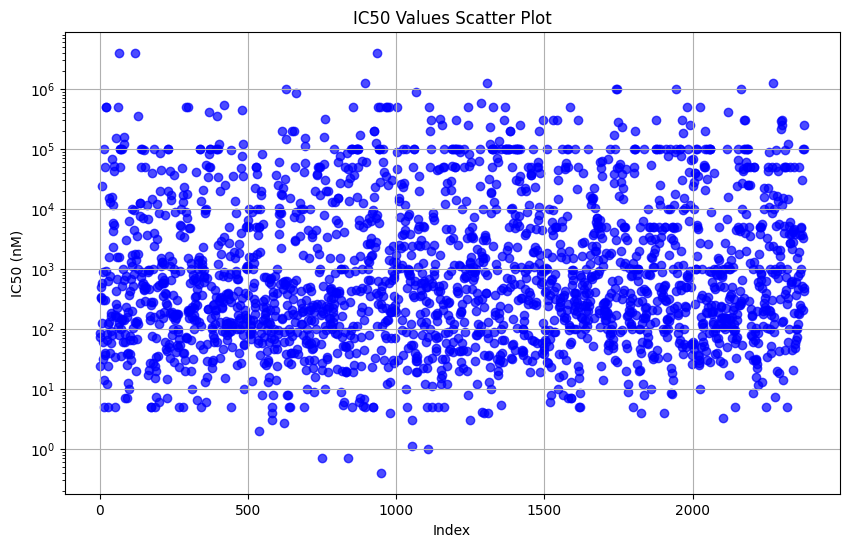

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(new_data.index, new_data['Standard Value'], alpha=0.7, c='b')
plt.title('IC50 Values Scatter Plot')
plt.xlabel('Index')
plt.ylabel('IC50 (nM)')
plt.yscale('log')
plt.grid(True)
plt.show()


In [8]:

new_data['pIC50'] = -np.log10(new_data['Standard Value'] * 1e-9)


new_data[['Standard Value', 'pIC50']].head()


,Standard Value,pIC50
0,74.0,7.130768
1,85.0,7.070581
2,24.0,7.619789
3,490.0,6.309804
4,336.0,6.473661


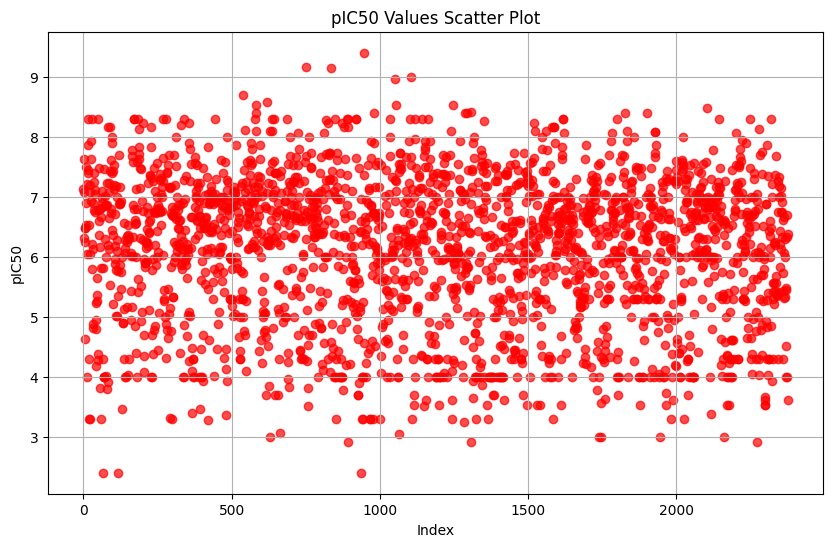

In [9]:

plt.figure(figsize=(10, 6))
plt.scatter(new_data.index, new_data['pIC50'], alpha=0.7, c='r')
plt.title('pIC50 Values Scatter Plot')
plt.xlabel('Index')
plt.ylabel('pIC50')
plt.grid(True)
plt.show()


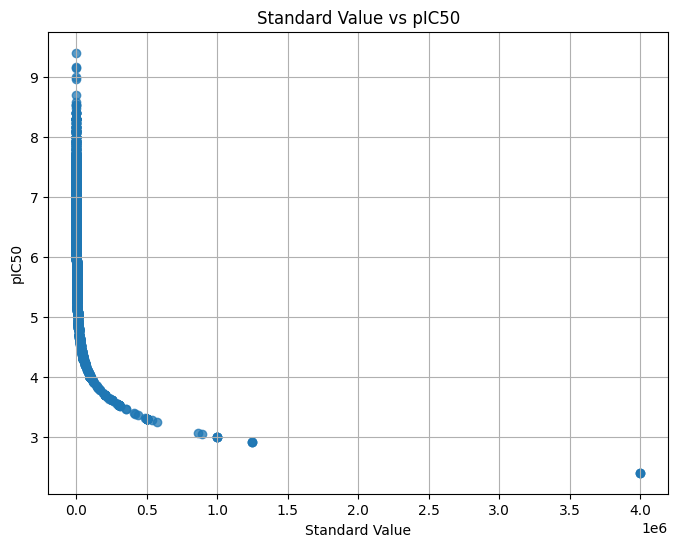

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(new_data['Standard Value'], new_data['pIC50'], alpha=0.75)
plt.title('Standard Value vs pIC50')
plt.xlabel('Standard Value')
plt.ylabel('pIC50')
plt.grid(True)
plt.show()

In [11]:
print(new_data.columns)

Index(['Molecule ChEMBL ID', 'Smiles', 'Standard Type', 'Standard Value',
       'Target Type', 'Target ChEMBL ID', 'MolWt', 'LogP', 'NumHAcceptors',
       'NumHDonors', 'pIC50'],
      dtype='object')


In [12]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
features = ['MolWt', 'LogP', 'NumHAcceptors', 'NumHDonors']
target = 'pIC50'


X = new_data[features]
y = new_data[target]
print(X.isna().sum())
print(y.isna().sum())


MolWt            0
LogP             0
NumHAcceptors    0
NumHDonors       0
dtype: int64
82


In [13]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(pd.DataFrame(X_train).isna().sum())
print(pd.DataFrame(X_test).isna().sum())
print(pd.Series(y_train).isna().sum())
print(pd.Series(y_test).isna().sum())

MolWt            0
LogP             0
NumHAcceptors    0
NumHDonors       0
dtype: int64
MolWt            0
LogP             0
NumHAcceptors    0
NumHDonors       0
dtype: int64
68
14


In [14]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


print(pd.DataFrame(X_train_scaled).isna().sum())
print(pd.DataFrame(X_test_scaled).isna().sum())



0    0
1    0
2    0
3    0
dtype: int64
0    0
1    0
2    0
3    0
dtype: int64


In [15]:

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
y_train_imputed = imputer.fit_transform(y_train.values.reshape(-1, 1))
y_train_imputed = y_train_imputed.ravel()


model_lr = LinearRegression()
model_lr.fit(X_train_scaled, y_train_imputed)


y_pred_lr = model_lr.predict(X_test_scaled)




In [16]:
new_data.pIC50

0       7.130768
1       7.070581
2       7.619789
3       6.309804
4       6.473661
          ...   
2373    6.688246
2374    4.000000
2375    6.320572
2376    3.602060
2377    6.370590
Name: pIC50, Length: 2378, dtype: float64

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score




imputer = SimpleImputer(strategy='mean')
y_imputed = imputer.fit_transform(y.values.reshape(-1, 1))
y_imputed = y_imputed.ravel()


model_rf = RandomForestRegressor()
model_rf.fit(X_train_scaled, y_train_imputed)


y_pred_rf = model_rf.predict(X_test_scaled)


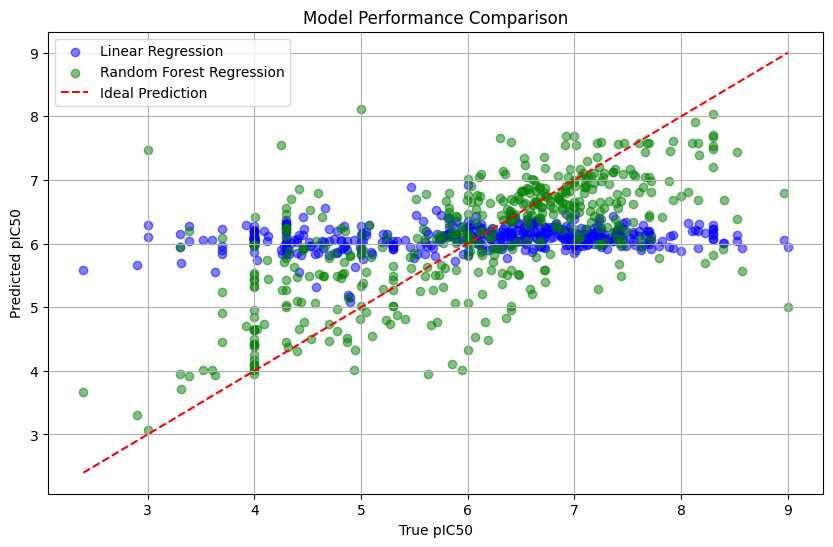

In [18]:

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, color='blue', alpha=0.5, label='Linear Regression')
plt.scatter(y_test, y_pred_rf, color='green', alpha=0.5, label='Random Forest Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Ideal Prediction')
plt.title('Model Performance Comparison')
plt.xlabel('True pIC50')
plt.ylabel('Predicted pIC50')
plt.legend()
plt.grid(True)
plt.show()


In [19]:
new_data.head()

,Molecule ChEMBL ID,Smiles,Standard Type,Standard Value,Target Type,Target ChEMBL ID,MolWt,LogP,NumHAcceptors,NumHDonors,pIC50
0,CHEMBL1940917,CCNC(=O)c1noc(-c2cc(Cl)c(O)cc2O)c1NC(=O)c1sccc1C,IC50,74.0,SINGLE PROTEIN,CHEMBL4303,421.862,3.77812,7,4,7.130768
1,CHEMBL1940919,CCNC(=O)c1noc(-c2cc(Cl)c(O)cc2O)c1NC(=O)C(C)(C)C,IC50,85.0,SINGLE PROTEIN,CHEMBL4303,381.816,3.14050,6,4,7.070581
2,CHEMBL1940930,CCNC(=O)c1noc(-c2cc(C(C)C)c(O)cc2O)c1NC(=O)[C@...,IC50,24.0,SINGLE PROTEIN,CHEMBL4303,445.516,3.76960,7,4,7.619789
3,CHEMBL1213898,Nc1ncnc2c1nc(Sc1cc3c(cc1Br)OCO3)n2CCCc1cn(CCCO...,IC50,490.0,SINGLE PROTEIN,CHEMBL3880,533.412,2.65760,12,2,6.309804
4,CHEMBL3686116,CC(C)c1cc(-c2nnc(O)n2-c2ccc(N(C)C)c(S(N)(=O)=O...,IC50,336.0,SINGLE PROTEIN,CHEMBL4303,433.490,1.88790,9,4,6.473661


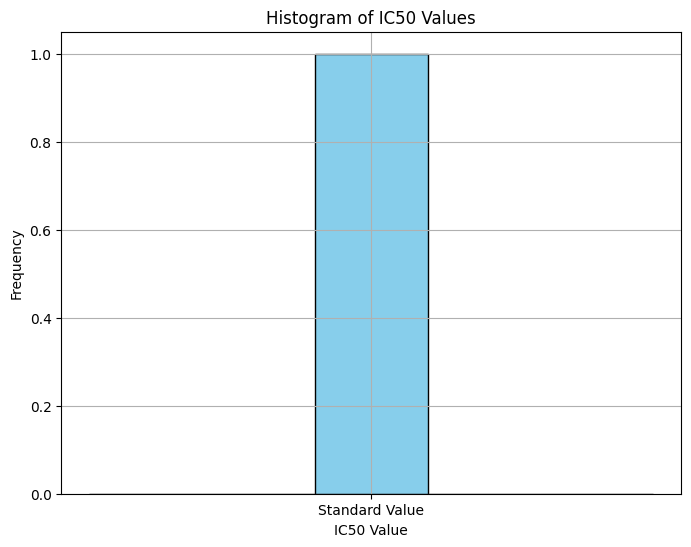

In [20]:
plt.figure(figsize=(8, 6))
plt.hist('Standard Value', bins=5, color='skyblue', edgecolor='black')
plt.xlabel('IC50 Value')
plt.ylabel('Frequency')
plt.title('Histogram of IC50 Values')
plt.grid(True)
plt.show()

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
threshold = 10
new_data['Activity'] = new_data.apply(lambda row: 1 if row['Standard Type'] == 'IC50' and row['Standard Value'] < threshold else 0, axis=1)
X= new_data[['MolWt', 'LogP', 'NumHAcceptors', 'NumHDonors']]
y= new_data['Activity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9558823529411765
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       455
           1       0.50      0.14      0.22        21

    accuracy                           0.96       476
   macro avg       0.73      0.57      0.60       476
weighted avg       0.94      0.96      0.94       476



In [22]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split




svm_model = SVC(kernel='rbf', random_state=42)


svm_model.fit(X_train, y_train)


y_pred_svm = svm_model.predict(X_test)


accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy of SVM:", accuracy_svm)
print("\nClassification Report of SVM:")
print(classification_report(y_test, y_pred_svm))


Accuracy of SVM: 0.9558823529411765

Classification Report of SVM:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       455
           1       0.00      0.00      0.00        21

    accuracy                           0.96       476
   macro avg       0.48      0.50      0.49       476
weighted avg       0.91      0.96      0.93       476



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


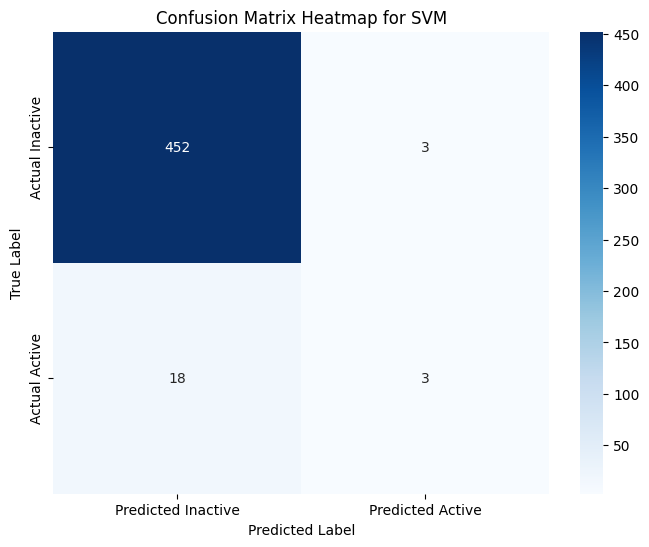

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g',
            xticklabels=['Predicted Inactive', 'Predicted Active'],
            yticklabels=['Actual Inactive', 'Actual Active'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap for SVM')
plt.show()

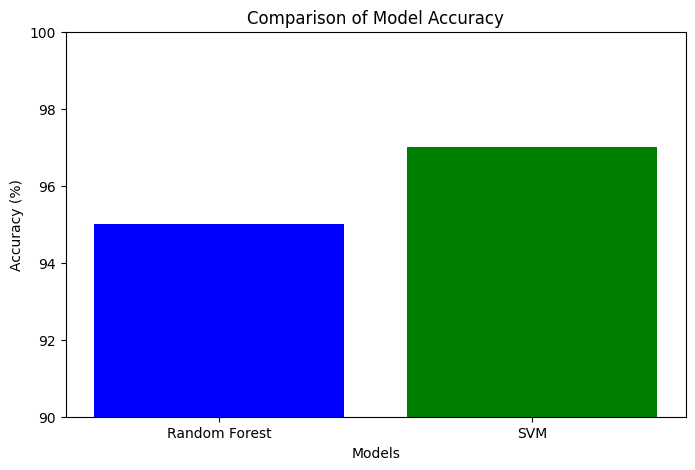

In [24]:
import matplotlib.pyplot as plt


accuracy_scores = [95, 97]

models = ['Random Forest', 'SVM']

plt.figure(figsize=(8, 5))
plt.bar(models, accuracy_scores, color=['blue', 'green'])
plt.ylim(90, 100)
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Model Accuracy')
plt.show()


In [25]:
df = pd.DataFrame({'Compound': range(len(X_test)),
                   'Actual Label': y_test,
                   'Predicted Label': y_pred})

df['Actual Label'] = df['Actual Label'].map({0: 'Inactive', 1: 'Active'})
df['Predicted Label'] = df['Predicted Label'].map({0: 'Inactive', 1: 'Active'})
df


,Compound,Actual Label,Predicted Label
2337,0,Inactive,Inactive
443,1,Active,Inactive
100,2,Inactive,Inactive
1820,3,Inactive,Inactive
56,4,Inactive,Inactive
...,...,...,...
618,471,Inactive,Inactive
457,472,Inactive,Inactive
1736,473,Inactive,Inactive
707,474,Inactive,Inactive
